In [1]:
# imports
import os
import math
import numpy as np
import matplotlib.pyplot as plt
 
from scipy import signal
from scipy.io import wavfile
from scipy.signal import butter, lfilter, freqz

# ipython specific
%matplotlib inline

# constants
dur = 1  # duration in seconds
samplingFreq = 44100  # sampling frequency in Hz

# setup folders
if not os.path.exists("sounds"):
    os.makedirs("sounds")
if not os.path.exists("plots"):
    os.makedirs("plots")

In [2]:
#Synthesequellen

In [3]:
def sineWave(freq):
    return np.sin(2 * np.pi * freq *  np.linspace(0, 1, samplingFreq))

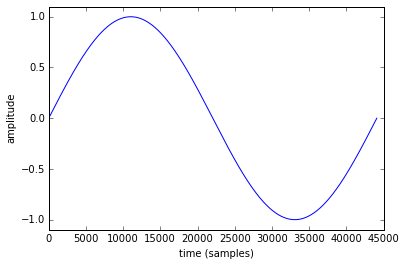

In [4]:
plt.plot(sineWave(1))
plt.xlabel("time (samples)")
plt.ylabel("amplitude")
plt.ylim(-1.1, 1.1)
plt.savefig('plots/sine.pdf')

In [5]:
wavfile.write('sounds/sineSimple.wav', 44100, sineWave(440))

In [6]:
def squareWave(freq):
    sig = np.zeros(44100)
    for n in range (1, 100):
        sig += np.sin((2*n-1) * sineWave(freq)) / (2*n-1)
    
    # normalize
    sig /= np.amax(sig)

    return sig

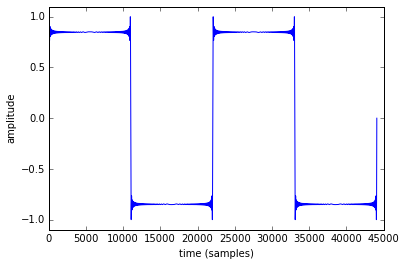

In [7]:
plt.plot(squareWave(2))
plt.xlabel("time (samples)")
plt.ylabel("amplitude")
plt.ylim(-1.1, 1.1)
plt.savefig('plots/square_summed.pdf')

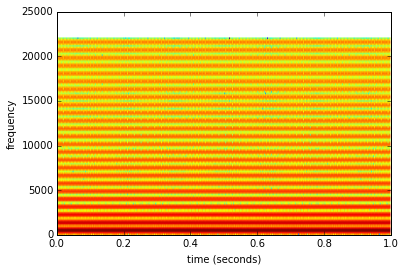

In [8]:
_ = plt.specgram(squareWave(440), Fs = 44100)
plt.xlabel("time (seconds)")
plt.ylabel("frequency")
plt.savefig('plots/square_summed_spec.pdf')

In [9]:
wavfile.write('sounds/square.wav', 44100, squareWave(440))

In [10]:
def squareWave_(freq):
    return np.vectorize(lambda x: 0.999999 if x >= 0 else -0.999999)(sineWave(freq))

(-1.1, 1.1)

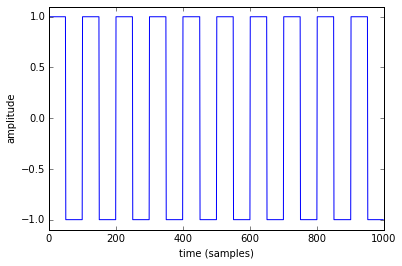

In [11]:
plt.plot(squareWave_(440)[:1000])
plt.ylabel("amplitude")
plt.xlabel("time (samples)")
plt.ylim(-1.1, 1.1)

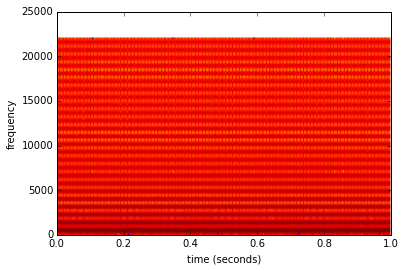

In [12]:
_ = plt.specgram(squareWave_(440), Fs = 44100)
plt.xlabel("time (seconds)")
plt.ylabel("frequency")

In [13]:
def squareWave_2(freq):
    period = math.floor(44100/freq)
    halfPeriod = math.floor(44100/(freq*2))
    return np.vectorize(lambda x: 0.999999 if x%period <= halfPeriod else -0.999999)(np.arange(1, 44100, 1))

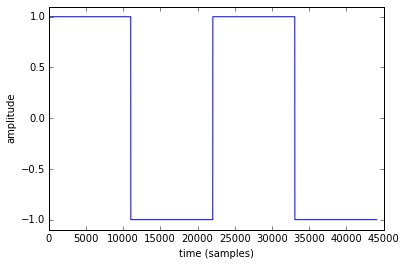

In [14]:
plt.plot(squareWave_2(2))
plt.xlabel("time (samples)")
plt.ylabel("amplitude")
plt.ylim(-1.1, 1.1)
plt.savefig('plots/square_f2.pdf')

In [15]:
time squareWave(440)

CPU times: user 179 ms, sys: 5.45 ms, total: 185 ms
Wall time: 196 ms


array([  0.00000000e+00,   8.06364927e-01,   8.28305082e-01, ...,
        -8.28305082e-01,  -8.06364927e-01,   6.71094815e-12])

In [16]:
time squareWave_(440)

CPU times: user 16.8 ms, sys: 2.7 ms, total: 19.5 ms
Wall time: 21 ms


array([ 0.999999,  0.999999,  0.999999, ..., -0.999999, -0.999999,
        0.999999])

In [17]:
time squareWave_2(440)

CPU times: user 13.4 ms, sys: 1.38 ms, total: 14.8 ms
Wall time: 14.1 ms


array([ 0.999999,  0.999999,  0.999999, ..., -0.999999, -0.999999,
       -0.999999])

In [18]:
wavfile.write('sounds/squareDirect.wav', 44100, squareWave_(220))

In [19]:
def pulseWave(freq, T2):
    period = math.floor(44100/freq)
    halfPeriod = math.floor(44100/(freq*(1/T2)))
    return np.vectorize(lambda x: 0.999999 if x%period <= halfPeriod else -0.999999)(np.arange(1, 44100, 1))

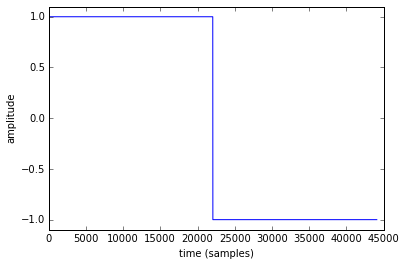

In [20]:
plt.plot(pulseWave(1, 0.5))
plt.ylim(-1.1, 1.1)
plt.xlabel("time (samples)")
plt.ylabel("amplitude")
plt.savefig('plots/pulse025.pdf')
wavfile.write('sounds/pulse.wav', 44100, pulseWave(55, 0.25))

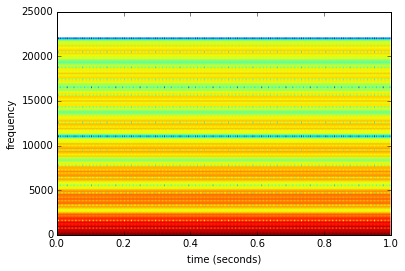

In [21]:
_ = plt.specgram(pulseWave(440, 0.15), Fs = 44100)
plt.xlabel("time (seconds)")
plt.ylabel("frequency")
plt.savefig('plots/pulse025_spec.pdf')

In [22]:
def sawtoothWaveRising(freq):
    return signal.sawtooth(2 * np.pi * freq * np.linspace(0, 1, samplingFreq), 1)

In [23]:
wavfile.write('sounds/sawtoothRising.wav', 44100, sawtoothWaveRising(220))

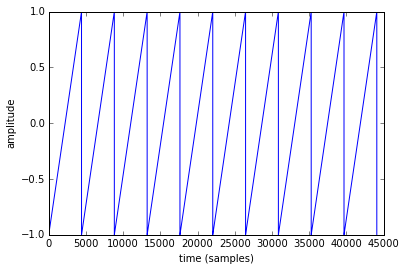

In [24]:
plt.plot(sawtoothWaveRising(10))
plt.xlabel("time (samples)")
plt.ylabel("amplitude")
plt.savefig('plots/sawtoothRising.pdf')

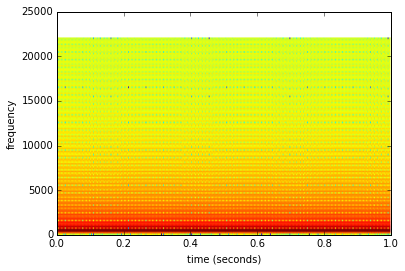

In [25]:
_ = plt.specgram(sawtoothWaveRising(440), Fs = 44100)
plt.xlabel("time (seconds)")
plt.ylabel("frequency")
plt.savefig('plots/sawtoothRising_spec.pdf')

In [26]:
def sawtoothWaveFalling(freq):
    return signal.sawtooth(2 * np.pi * freq * np.linspace(0, 1, samplingFreq), 0)

In [27]:
wavfile.write('sounds/sawtoothFalling.wav', 44100, sawtoothWaveFalling(220))

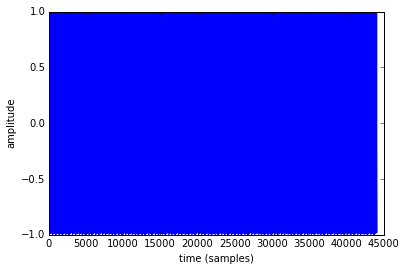

In [28]:
plt.plot(sawtoothWaveFalling(440))
plt.xlabel("time (samples)")
plt.ylabel("amplitude")
plt.savefig('plots/sawtoothFalling.pdf')

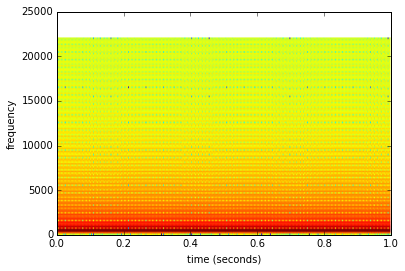

In [29]:
_ = plt.specgram(sawtoothWaveFalling(440), Fs = 44100)
plt.xlabel("time (seconds)")
plt.ylabel("frequency")

In [30]:
def triangleWave(freq):
    return signal.sawtooth(2 * np.pi * freq * np.linspace(0, 1, samplingFreq), 0.4)

In [31]:
wavfile.write('sounds/triangle.wav', 44100, triangleWave(220))

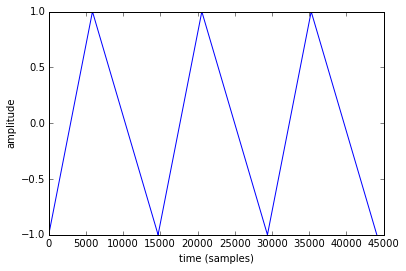

In [32]:
plt.plot(triangleWave(3))
plt.xlabel("time (samples)")
plt.ylabel("amplitude")
plt.savefig('plots/triangle.pdf')

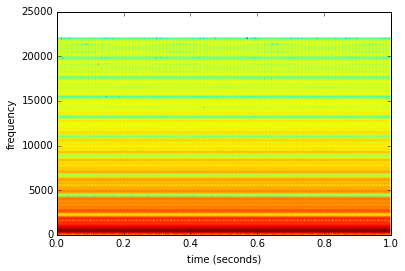

In [33]:
_ = plt.specgram(triangleWave(440), Fs = 44100)
plt.xlabel("time (seconds)")
plt.ylabel("frequency")
plt.savefig('plots/triangle_spec.pdf')

In [34]:
# noise
noise = np.random.uniform(-1, 1, 44100)

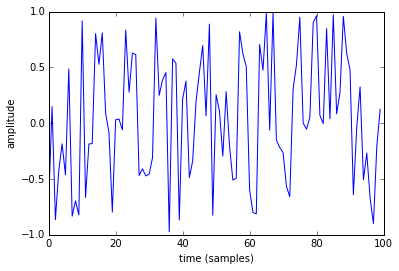

In [35]:
plt.plot(noise[:100])
plt.xlabel("time (samples)")
plt.ylabel("amplitude")
plt.savefig('plots/noise.pdf')

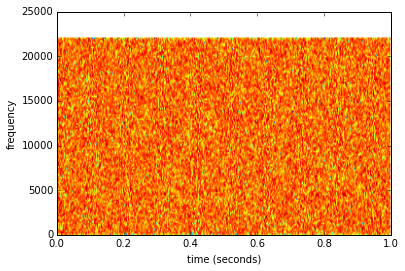

In [36]:
wavfile.write('sounds/noise.wav', 44100, noise)
_ = plt.specgram(noise, Fs = 44100)
plt.xlabel("time (seconds)")
plt.ylabel("frequency")
plt.savefig('plots/noise_spec.pdf')

In [37]:
#ADSR

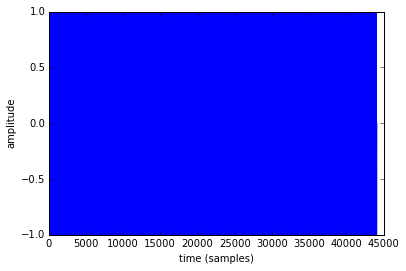

In [38]:
plt.plot(sineWave(440))
plt.xlabel("time (samples)")
plt.ylabel("amplitude")
plt.savefig('plots/ampConst.pdf')

In [39]:
def easeInQuad(t):
    return t*t

def easeOutQuad(t):
    return -t * (t - 2)

def easeOutInQuad(t):
    if t < 0.5 : 
        return easeOutQuad( t*2 ) * 0.5
    else:
        return easeInQuad((2*t)-1) * 0.5 + 0.5

def adsr(sig, maxamp, duration, attackDur, decayDur, sustainAmp, releaseDur):

    samplerate = 44100
    # convert to time in samples
    attackDur = attackDur * samplerate
    decayDur = decayDur * samplerate
    releaseDur = releaseDur * samplerate
    duration = duration * samplerate
    
    # attack
    attackEnd = math.ceil(attackDur)
    if attackDur > 0:
        for i in range(0, attackEnd):
            sig[i] *= (i / attackDur) * maxamp
            #sig[i] *= easeInQuad(i / attackDur) * maxamp
    
    # decay
    decayEnd = math.ceil(attackDur + decayDur)
    if decayDur > 0:
        for i in range(attackEnd, decayEnd):
            sig[i] *= maxamp - ((maxamp - sustainAmp) * ((i - attackEnd) / decayDur))
            #sig[i] *= maxamp - ((maxamp - sustainAmp) * easeOutQuad((i - attackEnd) / decayDur))
    
    # sustain
    sustainEnd = math.ceil(duration - releaseDur)
    for i in range(decayEnd, sustainEnd):
        sig[i] *= sustainAmp
    
    # release
    if releaseDur > 0:
        for i in range(sustainEnd, duration):
            sig[i] *= sustainAmp - sustainAmp * ((i-sustainEnd) / releaseDur)
            #sig[i] *= sustainAmp - sustainAmp * easeOutQuad((i-sustainEnd) / releaseDur)
    
    return sig

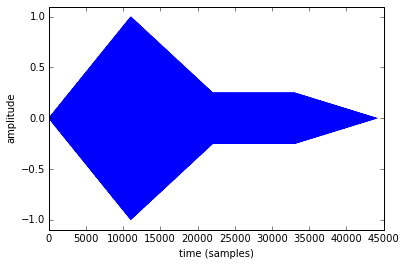

In [40]:
plt.plot(adsr(sineWave(440), 1, 1, 0.25, 0.25, 0.25, 0.25))

plt.xlabel("time (samples)")
plt.ylabel("amplitude")
plt.ylim(-1.1, 1.1)
plt.savefig("plots/sineADSR.pdf")

In [41]:
wavfile.write('sounds/sineSimple.wav', 44100, sineWave(400))

In [42]:
wavfile.write('sounds/sineADSR.wav', 44100, adsr(sineWave(400), 1, 1, 0.25, 0.25, 0.25, 0.25))

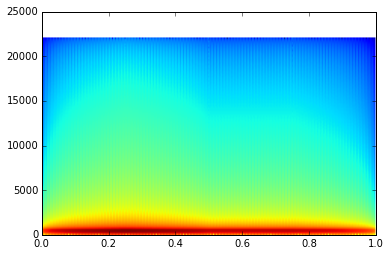

In [43]:
_ = plt.specgram(adsr(sineWave(400), 1, 1, 0.25, 0.25, 0.25, 0.25), Fs = 44100)

In [44]:
#Synthesemethoden

In [45]:
def additive(baseFreq, numberOfHarmonics):
    addSignal = np.zeros(44100)
    for i in range(0, numberOfHarmonics):
        addSignal += sineWave(baseFreq*(i+1)) / (i+1)
        # inharmonic
        # addSignal += np.sin(2 * np.pi * baseFreq * (np.random.random_sample() + 1) * timeArray) / 10

    addSignal /= np.amax(addSignal)
  
    return addSignal

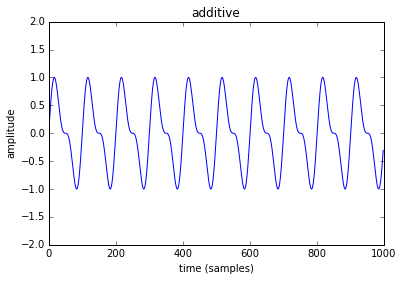

In [46]:
plt.plot(additive(440, 2)[:1000])
plt.xlabel("time (samples)")
plt.ylabel("amplitude")
plt.ylim(-2, 2)
plt.title("additive")

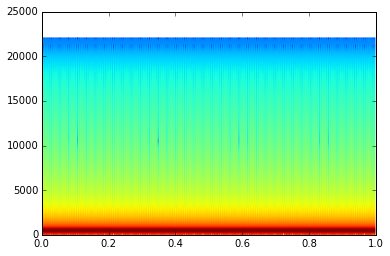

In [47]:
_ = plt.specgram(additive(440, 1), Fs = 44100)

In [48]:
wavfile.write('sounds/additive.wav', 44100, additive(440, 2))

In [49]:
def subtractive(carrierFreq, cutoffFreq, order):
    b, a = butter(order, cutoffFreq /(44100./2.), btype='lowpass', analog=False)
    return lfilter(b, a, squareWave(carrierFreq))

In [50]:
wavfile.write('sounds/subtractiveSquare.wav', 44100, subtractive(300, 5000, 30))

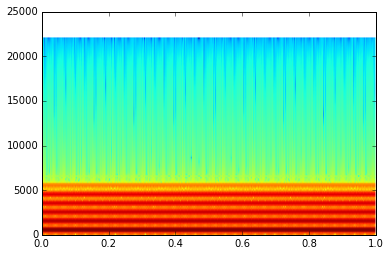

In [51]:
_ = plt.specgram(subtractive(500, 5000, 30), Fs=44100)

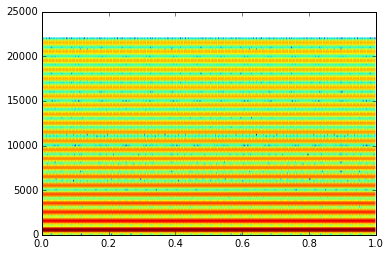

In [52]:
_ = plt.specgram(squareWave(500), Fs=44100)

In [53]:
def subtractive2(cutoffFreqLow, cutoffFreqHigh, order, normalize):
    b, a = butter(order, [cutoffFreqLow /(44100./2.), cutoffFreqHigh / (44100./2.)], btype='band', analog=False)
    signal = lfilter(b, a, np.random.uniform(-1, 1, 44100))
    if normalize:
        signal /= np.amax(signal)
    return signal

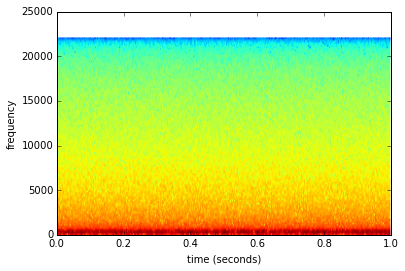

In [54]:
_ = plt.specgram(subtractive2(200, 300, 2, False), Fs=44100)
plt.xlabel("time (seconds)")
plt.ylabel("frequency")

In [55]:
wavfile.write('sounds/subtractiveNoise.wav', 44100, subtractive2(200, 300, 2, False))

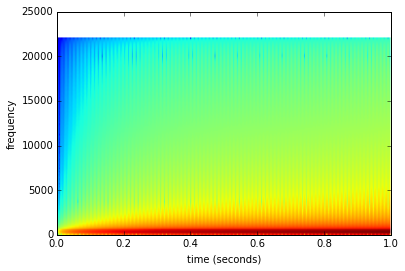

In [56]:
_ = plt.specgram(subtractive2(299.5,300.5, 3, True), Fs=44100)
plt.xlabel("time (seconds)")
plt.ylabel("frequency")

In [57]:
wavfile.write('sounds/subtractiveNoise2.wav', 44100, subtractive2(299.5, 300.5, 3, True))

In [58]:
def ringModulation(carrierFreq, modFreq):
    return sineWave(carrierFreq) * sineWave(modFreq)

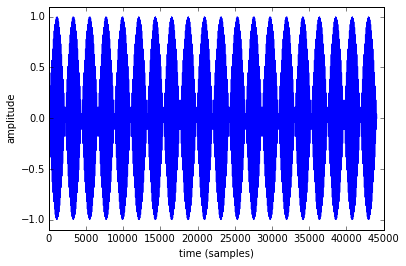

In [59]:
plt.plot(ringModulation(440, 10))
plt.xlabel("time (samples)")
plt.ylabel("amplitude")
plt.ylim(-1.1, 1.1)
plt.savefig("plots/ringMod.pdf")

In [60]:
#wavfile.write('sounds/ring.wav', 44100, ringModulation(500, 50))
wavfile.write('sounds/ring.wav', 44100, sineWave(100)*additive(440, 2))

In [61]:
def ampModulation(carrierFreq, modFreq, depth):
    depth = depth/2.
    return sineWave(carrierFreq) * (sineWave(modFreq) * depth + (1-depth))

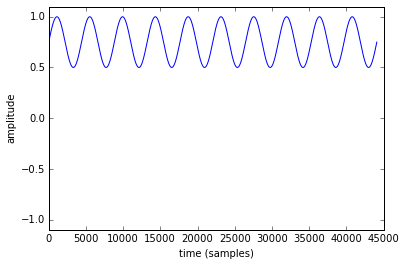

In [62]:
plt.plot((sineWave(10) * 0.25 + 0.75))
plt.xlabel("time (samples)")
plt.ylabel("amplitude")
plt.ylim(-1.1, 1.1)
plt.savefig("plots/ampMod.pdf")

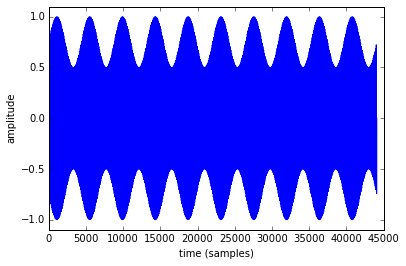

In [63]:
plt.plot(ampModulation(440, 10, 0.5))
plt.xlabel("time (samples)")
plt.ylabel("amplitude")
plt.ylim(-1.1, 1.1)
plt.savefig("plots/ampModResult.pdf")

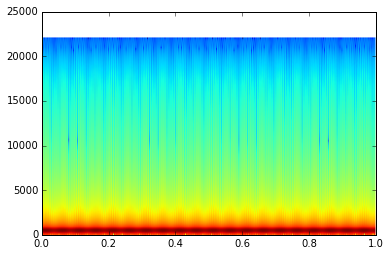

In [64]:
_ = plt.specgram(ampModulation(440, 20, 0.5), Fs = 44100)

In [65]:
wavfile.write('sounds/amplitudeModulation.wav', 44100, ampModulation(440, 10, 0.5))

In [66]:
def frequencyModulation(carrierFreq, modFreq, modDepth):
    modulationSignal = sineWave(modFreq)
    integrated = np.cumsum(modulationSignal) / 44100.
    modulated = np.sin(2*np.pi * carrierFreq * np.linspace(0, 1, samplingFreq) + modDepth * integrated)
    return modulated

In [67]:
wavfile.write('sounds/basicFM.wav', 44100, frequencyModulation(200, 2, 50))

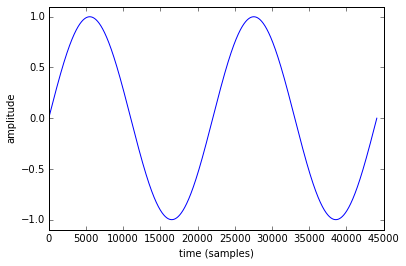

In [68]:
plt.ylim(-1.1, 1.1)
plt.xlabel("time (samples)")
plt.ylabel("amplitude")
plt.plot(frequencyModulation(2, 1, 0))

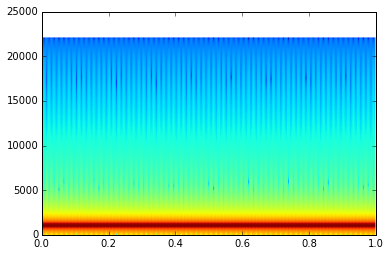

In [69]:
_ = plt.specgram(frequencyModulation(1000, 100, 50), Fs = 44100)

In [70]:
def FM_multipleCarrier(carrierFreqArray, modFreq, modDepth):
    sig = np.zeros(44100)
    for carrierFreq in carrierFreqArray:
        sig += frequencyModulation(carrierFreq, modFreq, modDepth) 
    sig /= np.amax(sig)
    return sig

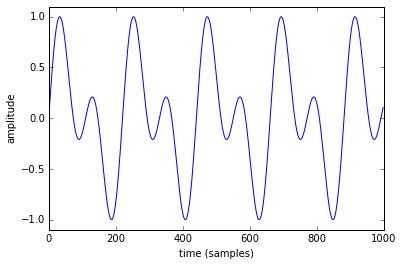

In [71]:
plt.ylim(-1.1, 1.1)
plt.xlabel("time (samples)")
plt.ylabel("amplitude")
plt.plot(FM_multipleCarrier([400, 200], 25, 0)[:1000])

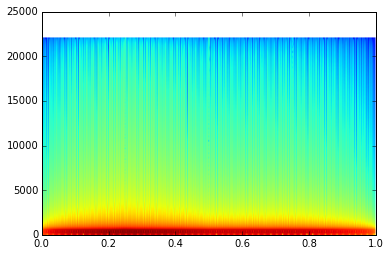

In [72]:
_ = plt.specgram(
    adsr(FM_multipleCarrier([400, 200], 13, 10), 1, 1, 0.25, 0.25, 0.25, 0.25), Fs=44100)

In [73]:
wavfile.write('sounds/multiCarrierFM.wav', 44100, 
              adsr(FM_multipleCarrier([400,500],13, 1000), 1, 1, 0.25, 0.25, 0.25, 0.25))

In [74]:
def fmFeedback(carrierFreq, modFreq, modDepth, feedbackDepth):
    
    modulationSignal = squareWave(modFreq)
    integrated = np.cumsum(modulationSignal) / 44100.
    
    modulated = np.sin(2*np.pi * carrierFreq * np.linspace(0, 1, samplingFreq) + modDepth * integrated)
    for n in range(0, feedbackDepth):
         modulated = np.sin(modulated + modDepth * integrated)
    
    return modulated

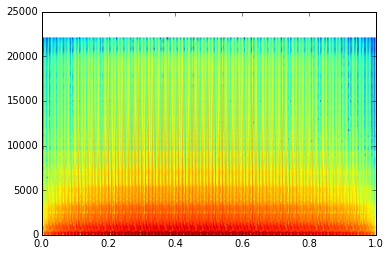

In [75]:
_ = plt.specgram(adsr(fmFeedback(800, 100, 1000, 10), 1, 1, 0.3, 0, 1, 0.5), Fs=44100)

In [76]:
wavfile.write('sounds/feedbackFM.wav', 44100, 
              adsr(fmFeedback(800, 100, 1000, 10), 1, 1, 0.3, 0, 1, 0.5))

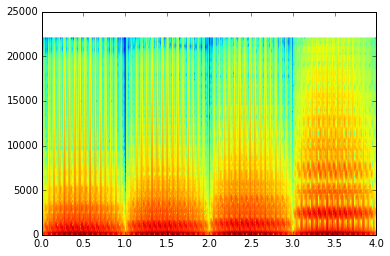

In [77]:
_ = plt.specgram(
    np.concatenate((
         adsr(fmFeedback(800, 100, 1000, 10), 1, 1, 0.3, 0, 1, 0.5),
         adsr(fmFeedback(1000, 100, 1000, 10), 1, 1, 0.3, 0, 1, 0.5),
         adsr(fmFeedback(1200, 100, 1000, 10), 1, 1, 0.3, 0, 1, 0.5),
         adsr(fmFeedback(2400, 100, 1000, 10), 1, 1, 0.3, 0, 1, 0.5)
    )), Fs=44100)

In [78]:
wavfile.write('sounds/multiFeedbackFM.wav', 44100, 
               np.concatenate((
                adsr(fmFeedback(800, 100, 1000, 10), 1, 1, 0.3, 0, 1, 0.5),
                adsr(fmFeedback(1000, 100, 1000, 10), 1, 1, 0.3, 0, 1, 0.5),
                adsr(fmFeedback(1200, 100, 1000, 10), 1, 1, 0.3, 0, 1, 0.5),
                adsr(fmFeedback(2400, 100, 1000, 10), 1, 1, 0.3, 0, 1, 0.5))))

In [79]:
def granularSynthesis(granMin, granMax):
    
    sig = (sineWave(50), squareWave(100), triangleWave(100))
    sigRes = np.zeros(44100)
 
    n = 0
    while n < 44100:
        wav = sig[np.random.randint(0, 3)]
        wav2 = sig[np.random.randint(0, 3)]

        granSize = np.random.randint(granMin, granMax)
        sigRes[n:granSize+n] = wav[n:granSize+n]*wav2[n:granSize+n]
        sigRes[n:granSize+n] *= np.random.uniform(0, 1)
        n += granSize
    
    return sigRes

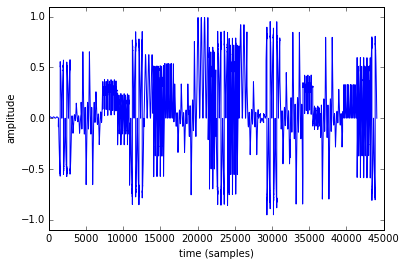

In [80]:
plt.ylim(-1.1, 1.1)
plt.xlabel("time (samples)")
plt.ylabel("amplitude")
wavfile.write('sounds/granular.wav', 44100, granularSynthesis(1000, 2000))
plt.plot(granularSynthesis(1000, 2000))

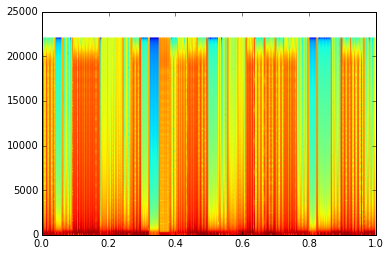

In [81]:
_ = plt.specgram(granularSynthesis(1000, 2000), Fs=44100)

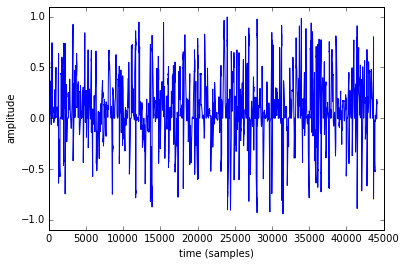

In [82]:
plt.ylim(-1.1, 1.1)
plt.xlabel("time (samples)")
plt.ylabel("amplitude")
wavfile.write('sounds/granular2.wav', 44100, granularSynthesis(300, 500))
plt.plot(granularSynthesis(100, 200))